In [1]:
%matplotlib inline
from quake_visualizer import Cell3DViewer
import plot_quake
from quake import Earthquake
        

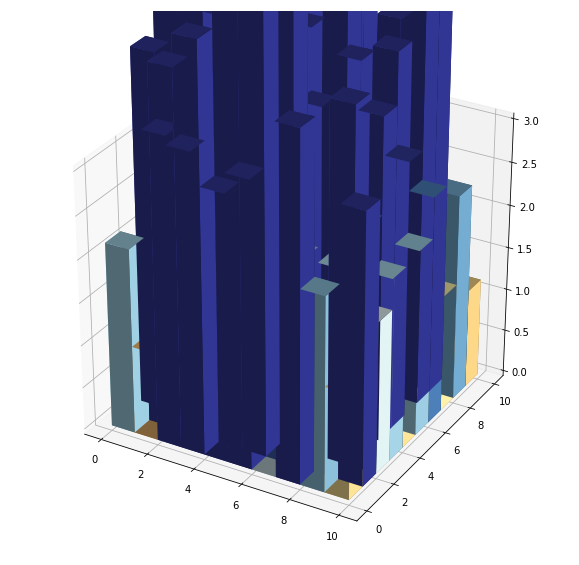

In [4]:
quake = Earthquake(10)
vis = Cell3DViewer(quake)
anim = vis.animate(frames=1000, interval=50)

In [5]:
anim

In [6]:
anim.save('basic_animation.mp4', fps=24, extra_args=['-vcodec', 'libx264'])